# project akhir 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Masukan Libraries
import cv2
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# masukan gambar yang ingin dihitung
filename = '/content/drive/MyDrive/tebu jpg/Tebu 11.jpg'

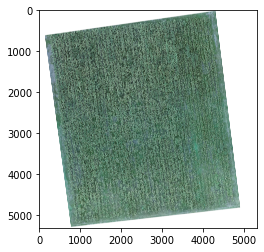

In [5]:
image = cv2.imread(filename)
plt.imshow(image)

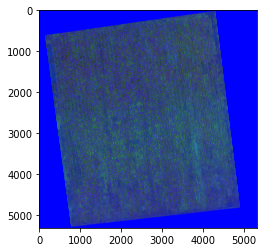

In [ ]:

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image, cmap='hsv')

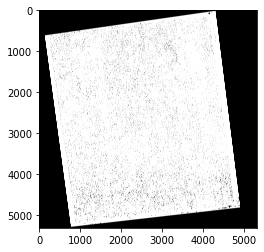

In [ ]:

threshold, binary_image = cv2.threshold(hsv_image[:, :, 2], 120, 210, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(binary_image, cmap='binary')


Range was found by searching different values

OTSU performed better than other methods

The output image consists of pixel value 0 for the tress and 1 for the background

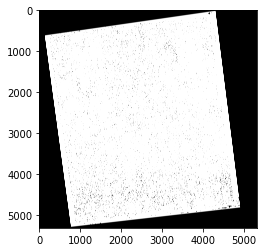

In [ ]:
from skimage import filters
import numpy as np

image_denoised = filters.median(binary_image, selem=np.ones((5, 5)))
plt.imshow(image_denoised, cmap='binary')

Better than the previous plot..!!

In [ ]:
binary_image = image_denoised

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


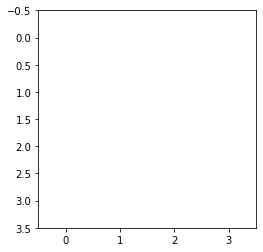

In [ ]:

kernel = np.ones((4, 4), dtype='uint8')
print(kernel)
plt.imshow(kernel, cmap='binary')

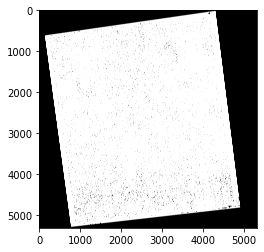

In [ ]:

morph_closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
plt.imshow(morph_closed_image, cmap='binary')

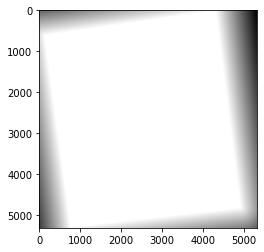

In [ ]:

dist_transform_image = cv2.distanceTransform(morph_closed_image, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)
plt.imshow(dist_transform_image, cmap='binary')

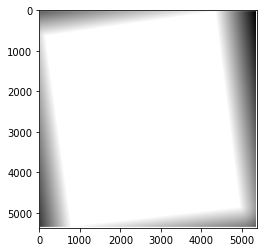

In [ ]:


border_size = 25
dist_border = cv2.copyMakeBorder(dist_transform_image, border_size, border_size, border_size, border_size, 
                                cv2.BORDER_CONSTANT | cv2.BORDER_ISOLATED, 0)
plt.imshow(dist_border, cmap='binary')

Let's perform some template matching now. I have extracted image of a single tree choosen at random from the image..

It is saved as template.jpg

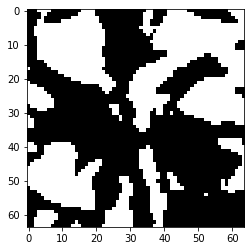

In [ ]:
gap = 8

template_file = cv2.imread('/content/drive/MyDrive/tebu jpg/Uji tebu.jpg')
template_file = cv2.resize(template_file, (64, 64))
template_file = cv2.cvtColor(template_file, cv2.COLOR_BGR2HSV)

_, kernel2 = cv2.threshold(template_file[:, :, 2], 120, 210, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# median filtering the teamplate also..!!

image_denoised = filters.median(kernel2, selem=np.ones((5, 5)))
plt.imshow(image_denoised, cmap='binary')

Loaded the template file and converted it to HSV channel and did the same thresholding done to the original image to get the template that we can use for matching with the actual image.!!

Also, applied some denoising with median filter.. - Perfromed better than without filtering

In [ ]:
kernel2 = image_denoised

In [ ]:
# for the opencv to consider the kernal template we made it must be a binary image with 0 and 1
# let's convert the pixel values to 0's and 1's - ofcourse there are better methods :D

for i in range(len(kernel2)):
    for j in range(len(kernel2[i])):
        if kernel2[i][j] != 0:
            kernel2[i][j] = 1

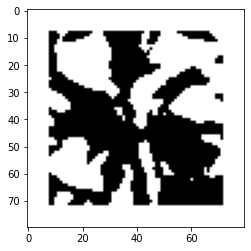

In [ ]:
# let's give some padding to our template - chosen after some trial and error.!!
kernel2 = cv2.copyMakeBorder(kernel2, gap, gap, gap, gap, cv2.BORDER_CONSTANT | cv2.BORDER_ISOLATED, 0)
plt.imshow(kernel2, cmap='binary')

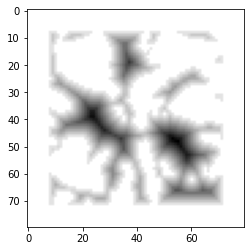

In [ ]:
# let's now apply distance transform on the template..!!
dist_trans_template = cv2.distanceTransform(kernel2, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)
plt.imshow(dist_trans_template, cmap='binary')

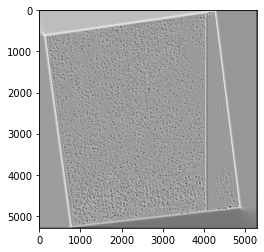

In [ ]:
# Finally, now we can try to match our template - not on the actual image but on the outputs of distance transforms
# simply because it is working better.!!
template_matched = cv2.matchTemplate(dist_border, dist_trans_template, cv2.TM_CCOEFF_NORMED)
plt.imshow(template_matched, cmap='binary')

In [ ]:
# Now let's threshold the template matched image..!!

mn, mx, _, _ = cv2.minMaxLoc(template_matched)
th, peaks = cv2.threshold(template_matched, 0.10, 0.60, cv2.THRESH_BINARY)

# let's go for the peak value in the template matched image..!
peaks8u = cv2.convertScaleAbs(peaks)

# find the coutnours in the peaks
contours, hierarchy = cv2.findContours(peaks8u, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
peaks8u = cv2.convertScaleAbs(peaks)


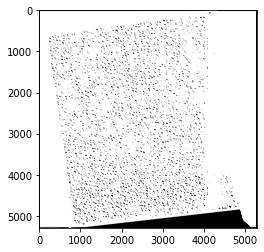

In [ ]:
plt.imshow(peaks8u, cmap='binary')

In [ ]:
copy = cv2.imread(filename)

Number of trees count :  2161
Real number of trees:  2254
Acuration:  95.8740017746229 %


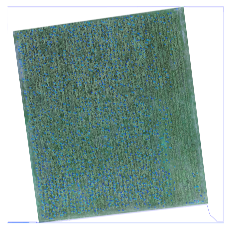

In [ ]:

count = 0
manual = 2254

for i in range(len(contours)):

    if cv2.contourArea(contours[i]) < 150:
        continue
        
    x, y, w, h = cv2.boundingRect(contours[i])    

    cv2.rectangle(copy, (x, y), (x+w, y+h), (0, 255, 255), 2)
    cv2.drawContours(copy, contours, i, (0, 0, 255), 2)
    
    count += 1

accuration = count*100/manual


print('Number of trees count : ', count)
print('Real number of trees: ', manual)
print('Acuration: ', accuration, '%')

plt.axis('off')
plt.imshow(copy)
